# Flight Fare Prediction

*Debapratim Gupta*  
*Regd: 18352019 (M.C.A)*

![Image](./Flight_image.jpg)

### <span style='color: blue'>I. Exploratory Data Analysis (EDA)</span>

In [1]:
# Importing the basic libraries used for data analysis and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading/Reading the training dataset
df_train = pd.read_excel("Data_Train.xlsx")
# For viewing all the columns
pd.set_option('display.max_columns',None)

In [3]:
#Viewing the dataframe
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# No. of data instances and no. of features(including the target)
df_train.shape

(10683, 11)

In [5]:
# Finding the summary on the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Observation:
- The data-types of Dates and times are given in string format

In [6]:
# Check the rows which contains null-values
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Observation:
- Two null values are present in the dataset

In [7]:
# Viewing rows actually contain null values
df_train[pd.isnull(df_train).any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
# We drop these 2 rows having null entries
df_train.dropna(inplace=True)

In [9]:
# No. of data instances after dropping 
df_train.shape[0]

10682

In [10]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
pd.crosstab(index=df_train['Airline'],columns='count')

col_0,count
Airline,
Air Asia,319
Air India,1751
GoAir,194
IndiGo,2053
Jet Airways,3849
Jet Airways Business,6
Multiple carriers,1196
Multiple carriers Premium economy,13
SpiceJet,818


#### Observation:
- Jet Airways is the most chosen airline followed by IndiGo

In [12]:
pd.crosstab(index=df_train['Source'],columns='count')

col_0,count
Source,
Banglore,2197
Chennai,381
Delhi,4536
Kolkata,2871
Mumbai,697


#### Observation:
- There are 5 major cities as Source in the dataset
- Delhi is recorded to be the most important source.

In [13]:
pd.crosstab(index=df_train['Destination'],columns='count')

col_0,count
Destination,
Banglore,2871
Cochin,4536
Delhi,1265
Hyderabad,697
Kolkata,381
New Delhi,932


#### Observation:
- Delhi and New Delhi are the same and should be merged ( a pre-processing step)
- Also, Cochin is the most important destination

In [14]:
pd.crosstab(index=df_train['Route'],columns='count').sort_values(by='count',ascending=False)

col_0,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
...,...
CCU → IXZ → MAA → BLR,1
BOM → JAI → DEL → HYD,1
BOM → BBI → HYD,1


#### Observation:
- Most passengers travelling from Delhi to Cochin prefer the route having 1-stop at Bombay

In [15]:
pd.crosstab(index=df_train['Total_Stops'],columns='count')

col_0,count
Total_Stops,
1 stop,5625
2 stops,1520
3 stops,45
4 stops,1
non-stop,3491


In [16]:
pd.crosstab(index=df_train['Duration'],columns='count').sort_values(by='count',ascending=False)

col_0,count
Duration,
2h 50m,550
1h 30m,386
2h 45m,337
2h 55m,337
2h 35m,329
...,...
29h 40m,1
31h 30m,1
33h 45m,1


In [17]:
pd.crosstab(index=df_train['Additional_Info'],columns='count').sort_values(by='count',ascending=False)

col_0,count
Additional_Info,
No info,8344
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
2 Long layover,1


## *EDA SUMMARY / Key-insights:*

- The data-types of Dates and times are given in string format.
- Two null values were present in the dataset in a single row which was dropped.
- There are a total of 10682 data instances at the end of EDA.
- Jet Airways is the most chosen airline followed by IndiGo.
- There are 5 major cities as Source in the dataset
- Delhi is recorded to be the most important source
- Delhi and New Delhi are the same and should be merged ( a pre-processing step)
- Also, Cochin is the most important destination.
- Most passengers travelling from Delhi to Cochin prefer the route having 1-stop at Bombay.




### <span style ='color:blue'> II. Data Pre-processing and Feature Engineering</span>

#### By visual inspection we see that the **Date of Journey** feature in the dataframe is in string/object type. So we convert it into datetime format

In [18]:
df_train["Journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day
df_train["Journey_month"] = pd.to_datetime(df_train.Date_of_Journey, format = "%d/%m/%Y").dt.month
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Now, we can drop the column *Date of Journey*`

In [19]:
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### By visual inspection we see that the Dep_time feature in the dataframe is in string/object type. So we convert it into datetime format and after conversion we can drop it.

In [20]:
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

#### We do it similarly for Arrival_time

In [21]:
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

#### Again we split Duration into Duration_hours and Duration_mins

In [22]:
duration=list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:    
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"   
        else:
            duration[i]="0h "+duration[i]           

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))    
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))   
    
df_train["Duration_hours"]=duration_hours
df_train["Duration_mins"]=duration_mins    
df_train.drop(["Duration"],axis=1,inplace=True)

#### Dropping the only row having Trujet Airlines as it is insignificant

In [23]:
df_train.drop(df_train[df_train['Airline']=='Trujet'].index, inplace=True)

In [24]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

### The Dataframe after all the necessary Data Pre-processing and Feature Engineering

In [25]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [26]:
df_train.shape

(10681, 15)

### <span style='color:blue'> III. Handling Categorical Data </span>

#### Check for the feature Airline - Nominal data

In [27]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: Airline, dtype: int64

### <span style='color:blue'> IV. Visualization (a) </span>

**Frequency Distribution of Airlines in Training set**

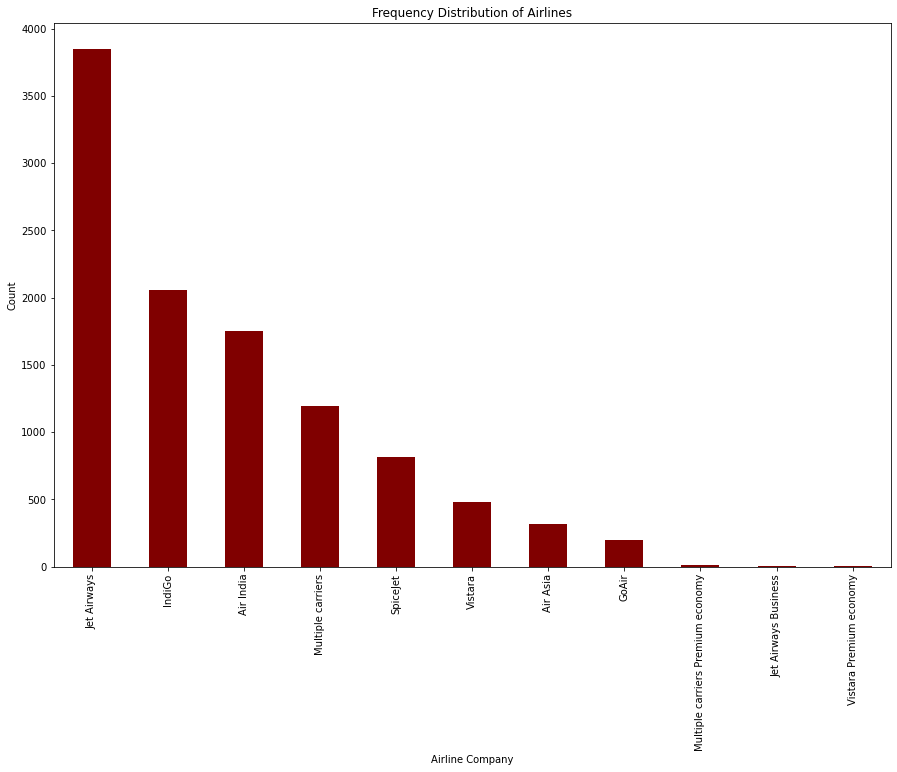

In [28]:
%matplotlib inline
plt.figure(figsize=(15,10))
df_train['Airline'].value_counts().plot(kind='bar',color='maroon')
plt.title("Frequency Distribution of Airlines")
plt.xlabel("Airline Company")
plt.ylabel("Count")
plt.show()

#### Cat-plot to find the distribution between the Airline and Price in the Training Set

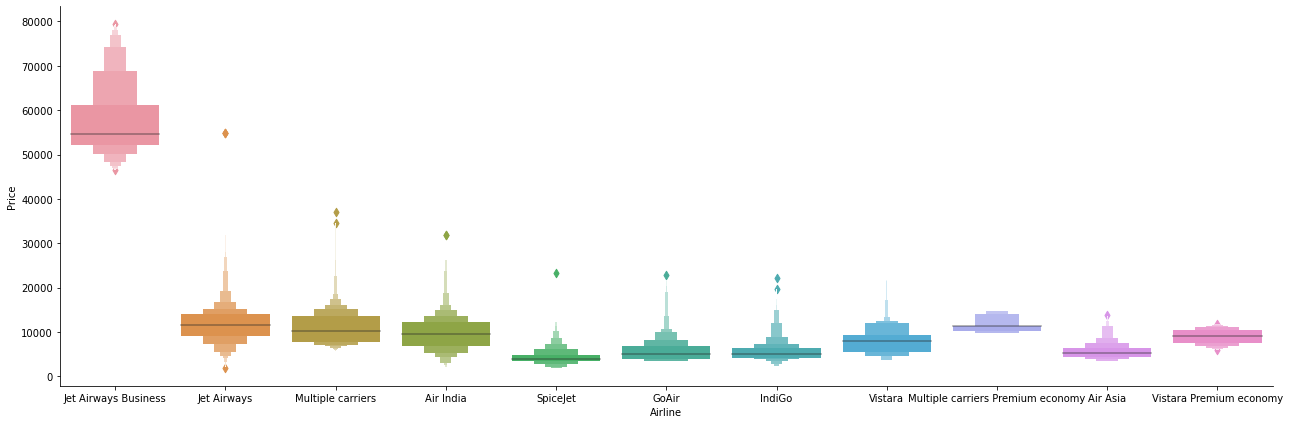

In [29]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Check for the feature Source - Nominal data

In [30]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

### <span style='color:blue'> IV. Visualization (b) </span>

#### Cat-plot to find the distribution between the Source and Price in the Training Set

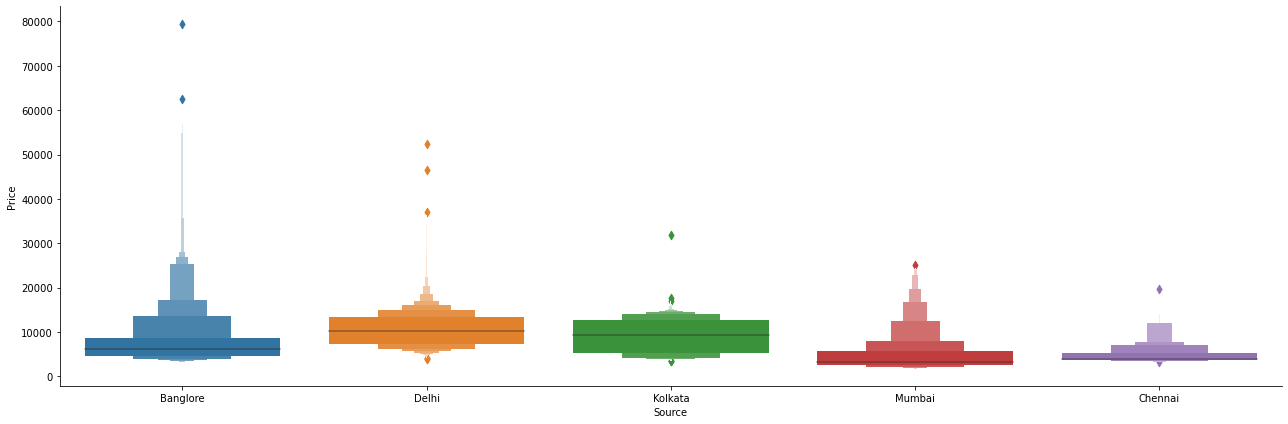

In [31]:
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Check for the feature Destination - Nominal Data

In [32]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

### <span style='color:blue'> IV. Visualization (c) </span>

#### Cat-plot to find the distribution between the Destination and Price in the Training Set

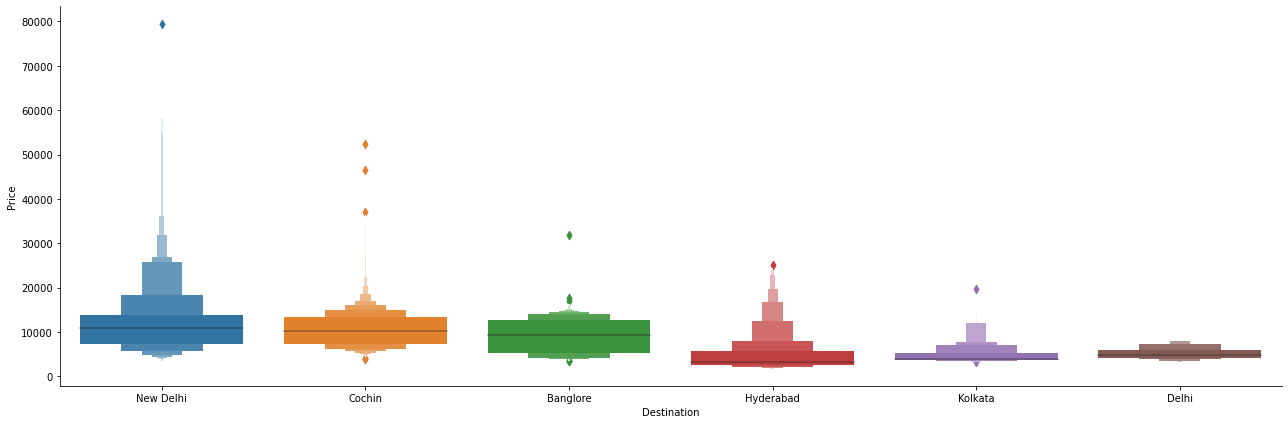

In [33]:
sns.catplot(y = "Price", x = "Destination", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [34]:
df_train["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → IXA → BLR                         1
BOM → JLR → HYD                         1
CCU → IXB → DEL → BLR                   1
BOM → JAI → DEL → HYD                   1
Name: Route, Length: 127, dtype: int64

In [35]:
df_train["Additional_Info"].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

#### We drop the feature "Additional Info" because most of it (nearly 78%) contains "no info"         
#### Again, we drop the feature "Route" - since Route and Total_stops are interrelated

In [36]:
df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [37]:
df_train["Total_Stops"].value_counts()

1 stop      5624
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### Label Encoding the ordinal feature "Total Stops"

In [38]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [39]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [40]:
df_train.shape

(10681, 13)

### <span style='color:blue'> IV. Visualization (d) </span>

#### Boxen-plot to find the distribution between the Total_stops and Price in the Training Set

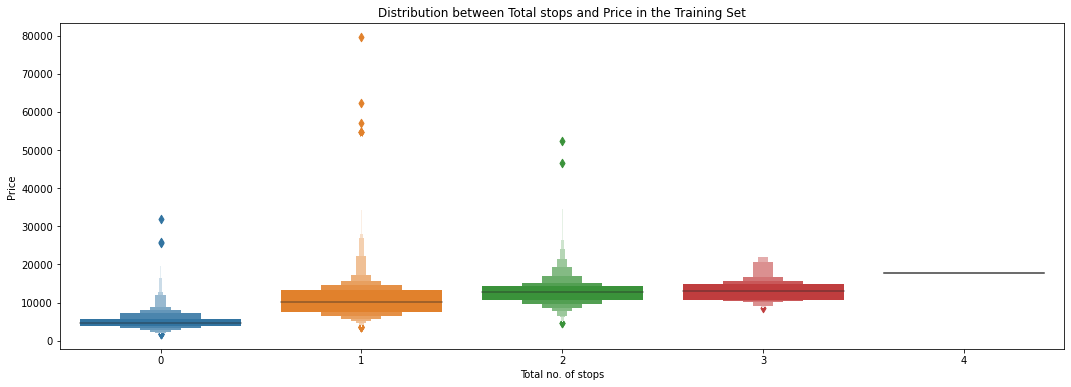

In [41]:
%matplotlib inline
plt.figure(figsize=(18,6))
sns.boxenplot(data=df_train,x='Total_Stops',y='Price')
plt.title("Distribution between Total stops and Price in the Training Set")
plt.xlabel("Total no. of stops")
plt.ylabel("Price")
plt.show()

#### Bar-plot to find the distribution between Source and Price by varying the Total Stops in the Training set

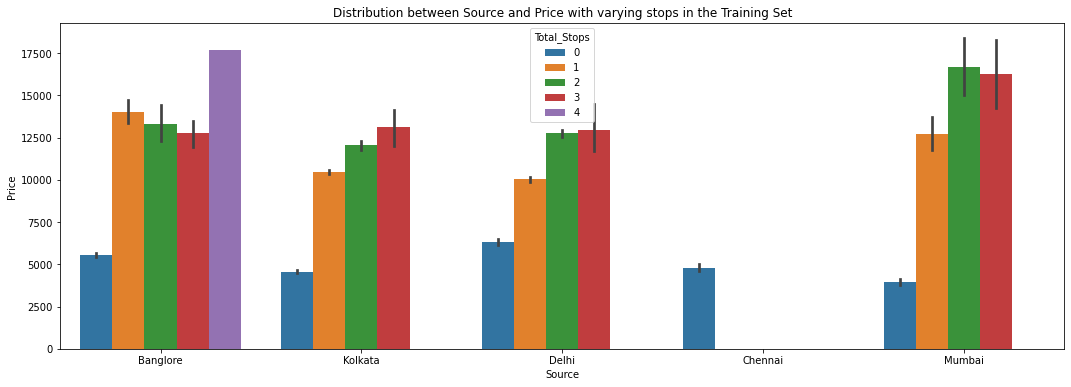

In [42]:
%matplotlib inline
plt.figure(figsize=(18,6))
sns.barplot(data=df_train,x='Source',y='Price',hue='Total_Stops')
plt.title("Distribution between Source and Price with varying stops in the Training Set")
plt.xlabel("Source")
plt.ylabel("Price")
plt.show()

#### Bar-plot to find the distribution between Destination and Price by varying the Total Stops in the Training set

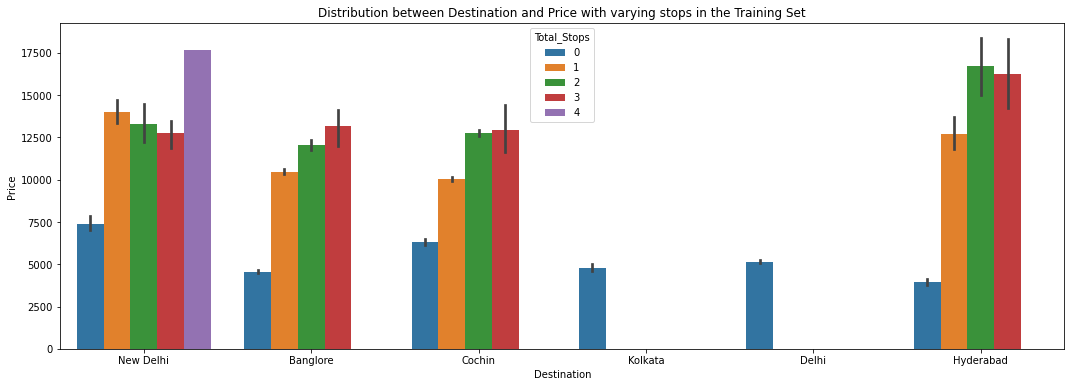

In [43]:
%matplotlib inline
plt.figure(figsize=(18,6))
sns.barplot(data=df_train,x='Destination',y='Price',hue='Total_Stops')
plt.title("Distribution between Destination and Price with varying stops in the Training Set")
plt.xlabel("Destination")
plt.ylabel("Price")
plt.show()

#### Making the same changes in the <span style='color:magenta'> Test Set</span>

In [44]:
df_test = pd.read_excel("Test_set.xlsx")

In [45]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
# EDA

print("Test data Info:")
print(df_test.info())

print()
print()

print("Null values :")
df_test.dropna(inplace = True)
print(df_test.isnull().sum())
print()
# Preprocessing and Feature Engineering

# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"],axis=1,inplace=True)

# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"],axis=1,inplace=True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"],axis=1,inplace=True)

# Duration
duration=list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split())!=2:    
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"   
        else:
            duration[i]="0h "+duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))    
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))   

# Adding Duration column to test set
df_test["Duration_hours"]=duration_hours
df_test["Duration_mins"]=duration_mins
df_test.drop(["Duration"],axis=1,inplace=True)


# Categorical data

print("Airline")
print(df_test["Airline"].value_counts())

print()

print("Source")
print(df_test["Source"].value_counts())

print()

print("Destination")
print(df_test["Destination"].value_counts())

# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"],axis=1,inplace=True)

# Replacing/Label Encoding Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

print()
print()
#Final Dataframe
print(df_test)
print("Shape of test data : ", df_test.shape)

Test data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Airline
Jet Airways                          897


### <span style='color:blue'> IV. Visualization (e) </span>

**Frequency Distribution of Airlines in Test set**

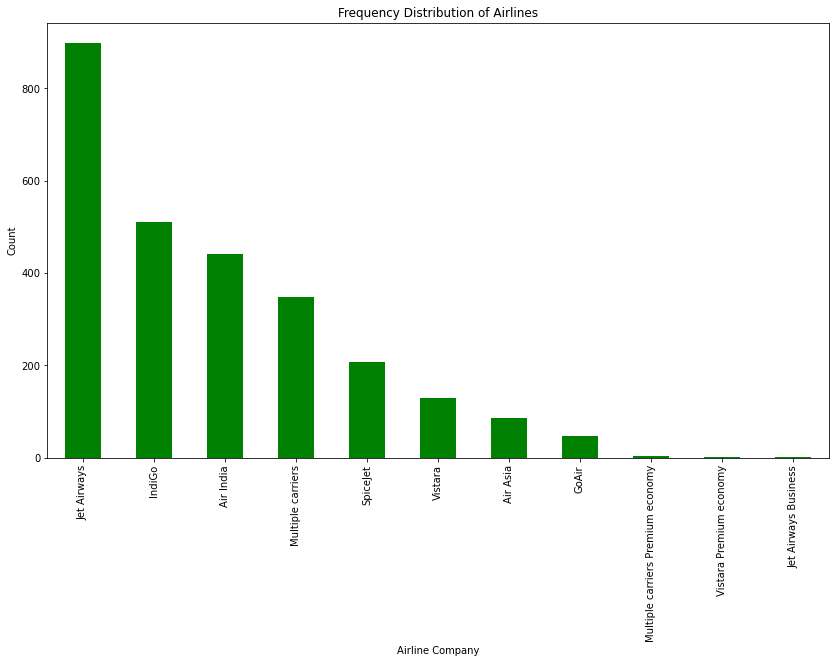

In [47]:
%matplotlib inline
plt.figure(figsize=(14,8))
df_test['Airline'].value_counts().plot(kind='bar',color='green')
plt.title("Frequency Distribution of Airlines")
plt.xlabel("Airline Company")
plt.ylabel("Count")
plt.show()

**Frequency Distribution of Source in Test set**

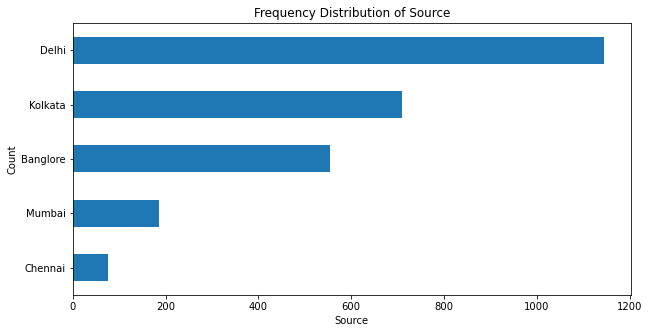

In [48]:
%matplotlib inline
plt.figure(figsize=(10,5))
df_test['Source'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title("Frequency Distribution of Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

### OneHotEncoding for Airlines

In [49]:
Airline = df_train[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


### OneHotEncoding for Source

In [50]:
Source = df_train[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### OneHotEncoding for Destination

In [51]:
Destination = df_train[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [52]:
df_train_data = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [53]:
df_train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
df_train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df_train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
df_train_data.shape

(10681, 29)

#### Making the same changes of OneHotEncoding in the <span style='color:magenta'> Test Set</span>

In [56]:
Airline2 = pd.get_dummies(df_test["Airline"], drop_first= True)
Source2 = pd.get_dummies(df_test["Source"], drop_first= True)
Destination2 = pd.get_dummies(df_test["Destination"], drop_first = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
df_test_data = pd.concat([df_test, Airline2, Source2, Destination2], axis = 1)

df_test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace=True)

In [57]:
print("Shape of test data : ", df_test_data.shape)

Shape of test data :  (2671, 28)


In [58]:
df_test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### <span style='color:blue'> V. Feature Selection </span>

In [59]:
df_train_data.shape

(10681, 29)

In [60]:
df_train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [61]:
D = df_train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
D.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
y = df_train.iloc[:, 4]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

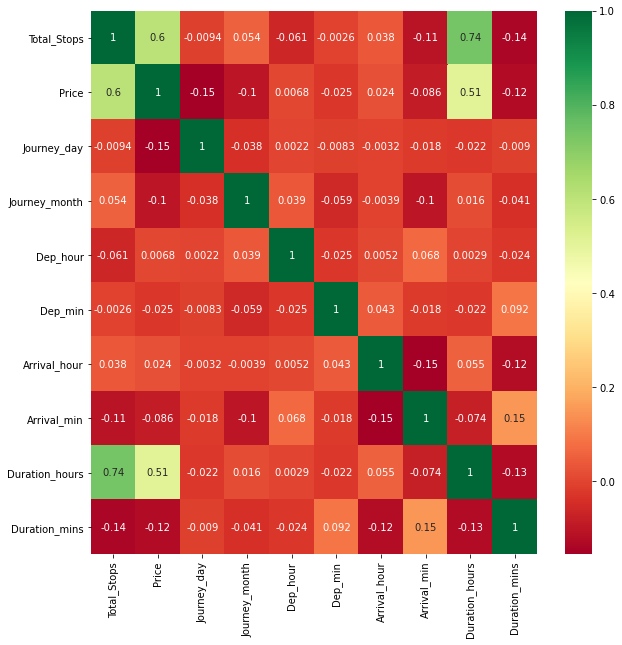

In [63]:
# To find the correlation for Independent and dependent attributes

plt.figure(figsize = (10,10))
sns.heatmap(df_train.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [64]:
# Feature importance implementation using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(D, y)

ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)

[2.12550952e-01 1.44735514e-01 5.34447015e-02 2.37685429e-02
 2.06469158e-02 2.79740427e-02 1.89715875e-02 1.35091649e-01
 1.77548004e-02 9.07816592e-03 1.92794277e-03 1.74732808e-02
 1.41141312e-01 6.74786899e-02 1.93141876e-02 8.31543303e-04
 2.98778547e-03 5.00503789e-03 8.96142460e-05 4.29274075e-04
 8.95835092e-03 3.22180607e-03 7.84237717e-03 1.10158919e-02
 1.64553228e-02 6.33007898e-03 4.84506587e-04 2.49961253e-02]


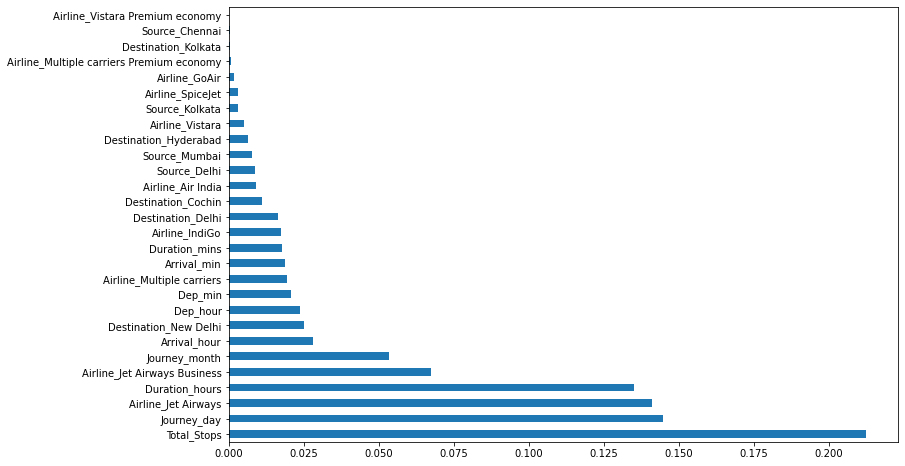

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=D.columns)
feat_importances.nlargest(29).plot(kind='barh')
plt.show()

### <span style='color:blue'> VI. Model Development </span>

In [70]:
# Splitting data into train and cross-validation data
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(D, y, test_size = 0.25,random_state=42)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import math

In [72]:
#maxR2_Score=0
#maxRS=0
#from sklearn.neighbors import KNeighborsRegressor
#for i in range(1,100):
    #KNR = KNeighborsRegressor(metric='manhattan',algorithm='ball_tree',n_neighbors=i)
    #KNR.fit(X_train, y_train)
    #predrf = KNR.predict(X_test)
    #score = r2_score(y_test, predrf)
    #if score>maxR2_Score:
        #maxR2_Score=score
        #maxRS=i
#print("Best accuracy is",maxR2_Score," on N= ",maxRS)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(D, y, test_size = 0.25,random_state=91)

In [74]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of test input is", X_test.shape)
print("The size of test output is", y_test.shape)

The size of training input is (8010, 28)
The size of training output is (8010,)
**************************************************
The size of test input is (2671, 28)
The size of test output is (2671,)


In [75]:
def print_score(reg, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n===================\n")
        print("Mean absolute error: {0:.4f}\n".format(mean_absolute_error(y_train, reg.predict(X_train))))
        print("Mean squared error: {}\n".format(mean_squared_error(y_train, reg.predict(X_train))))
        print("RMSE:  {}\n".format(math.sqrt(mean_squared_error(y_train,reg.predict(X_train)))))
        print("R2 score:  {}\n".format(r2_score(y_train, reg.predict(X_train))))
        print("Accuracy: {}\n".format(reg.score(X_train,y_train)))

        res = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
        print("Cross Validation Result:\n=======================\n")
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("\nTest Result:\n===================\n")        
        print("Mean absolute error: {0:.4f}\n".format(mean_absolute_error(y_test, reg.predict(X_test))))
        print("Mean squared error:  {}\n".format(mean_squared_error(y_test, reg.predict(X_test))))
        print("RMSE:  {}\n".format(math.sqrt(mean_squared_error(y_test,reg.predict(X_test)))))
        print("R2 score:  {}\n".format(r2_score(y_test, reg.predict(X_test))))
        print("Accuracy: {}\n".format(reg.score(X_test,y_test)))

### 1. Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print_score(lr,X_train, y_train, X_test, y_test, train=True)
print_score(lr,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1978.2749

Mean squared error: 8372850.601914365

RMSE:  2893.5878424396183

R2 score:  0.6039736690294935

Accuracy: 0.6039736690294935

Cross Validation Result:

Average Accuracy: 	 0.5997
Accuracy SD: 		 0.0504

Test Result:

Mean absolute error: 1910.0881

Mean squared error:  6941805.167599683

RMSE:  2634.730568312381

R2 score:  0.6789824348047542

Accuracy: 0.6789824348047542



### Linear Regression - Best parameters

In [78]:
lr2 = LinearRegression(normalize=True)
lr2.fit(X_train,y_train)
print_score(lr2,X_train, y_train, X_test, y_test, train=True)
print_score(lr2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1978.3116

Mean squared error: 8373751.381772784

RMSE:  2893.7434892838696

R2 score:  0.6039310631645016

Accuracy: 0.6039310631645016

Cross Validation Result:

Average Accuracy: 	 0.5996
Accuracy SD: 		 0.0503

Test Result:

Mean absolute error: 1909.7821

Mean squared error:  6941123.255709472

RMSE:  2634.601156856474

R2 score:  0.6790139692096226

Accuracy: 0.6790139692096226



In [79]:
"""
lr = LinearRegression()
print("Accuracy : ", cross_val_score(lr,D,y,cv=10).mean())
print("Mean Absolute Error : ", abs(cross_val_score(lr,D,y,cv=10, scoring='neg_mean_absolute_error').mean()))
print("Mean Squared Error : ", abs(cross_val_score(lr,D,y,cv=10, scoring='neg_mean_squared_error').mean()))
print("RMSE : ", abs(cross_val_score(lr,D,y,cv=10, scoring='neg_root_mean_squared_error').mean()))
print("R2 score = Accuracy : ", abs(cross_val_score(lr,D,y,cv=10, scoring='r2').mean()))
"""
print()

### 2. Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dtr = DecisionTreeRegressor(random_state=91)
dtr.fit(X_train,y_train)
print_score(dtr,X_train, y_train, X_test, y_test, train=True)
print_score(dtr,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 292.8169

Mean squared error: 573221.0180815648

RMSE:  757.1136097585123

R2 score:  0.9728872964036744

Accuracy: 0.9728872964036744

Cross Validation Result:

Average Accuracy: 	 0.6979
Accuracy SD: 		 0.0833

Test Result:

Mean absolute error: 1382.1727

Mean squared error:  6513535.295871813

RMSE:  2552.1628662512535

R2 score:  0.6987873916062283

Accuracy: 0.6987873916062283



### Decision Tree Regressor - Best parameters

In [82]:
dtr2 = DecisionTreeRegressor(max_depth=6,random_state=91)
dtr2.fit(X_train,y_train)
print_score(dtr2,X_train, y_train, X_test, y_test, train=True)
print_score(dtr2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1690.0633

Mean squared error: 6037165.327534708

RMSE:  2457.064371874434

R2 score:  0.7144489316960608

Accuracy: 0.7144489316960608

Cross Validation Result:

Average Accuracy: 	 0.6920
Accuracy SD: 		 0.0530

Test Result:

Mean absolute error: 1727.6580

Mean squared error:  6566403.047161306

RMSE:  2562.4993750557883

R2 score:  0.6963425697786849

Accuracy: 0.6963425697786849



In [83]:
"""
dtr = DecisionTreeRegressor(random_state=42)
print("Accuracy : ", cross_val_score(dtr,D,y,cv=10).mean())
print("Mean Absolute Error : ", abs(cross_val_score(dtr,D,y,cv=10, scoring='neg_mean_absolute_error').mean()))
print("Mean Squared Error : ", abs(cross_val_score(dtr,D,y,cv=10, scoring='neg_mean_squared_error').mean()))
print("RMSE : ", abs(cross_val_score(dtr,D,y,cv=10, scoring='neg_root_mean_squared_error').mean()))
print("R2 score = Accuracy : ", abs(cross_val_score(dtr,D,y,cv=10, scoring='r2').mean()))
"""
print()

### 3. K Neighbour Regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
knnr = KNeighborsRegressor()
knnr.fit(X_train,y_train)

print_score(knnr,X_train, y_train, X_test, y_test, train=True)
print_score(knnr,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1497.3926

Mean squared error: 6051989.896329588

RMSE:  2460.0792459450545

R2 score:  0.713747746416735

Accuracy: 0.713747746416735

Cross Validation Result:

Average Accuracy: 	 0.5360
Accuracy SD: 		 0.0553

Test Result:

Mean absolute error: 1832.3809

Mean squared error:  8320364.247652564

RMSE:  2884.5041597565023

R2 score:  0.6152322043284075

Accuracy: 0.6152322043284075



### K Neighbors Regressor - Best parameters

In [86]:
knnr2 = KNeighborsRegressor(metric="manhattan",n_neighbors=4)
knnr2.fit(X_train,y_train)

print_score(knnr2,X_train, y_train, X_test, y_test, train=True)
print_score(knnr2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1244.7565

Mean squared error: 4440711.203206928

RMSE:  2107.29950486563

R2 score:  0.7899593999320172

Accuracy: 0.7899593999320172

Cross Validation Result:

Average Accuracy: 	 0.6120
Accuracy SD: 		 0.0509

Test Result:

Mean absolute error: 1626.9261

Mean squared error:  7291860.760342568

RMSE:  2700.344563262727

R2 score:  0.6627944273121504

Accuracy: 0.6627944273121504



In [87]:
'''knnr = KNeighborsRegressor()
print("Accuracy : ", cross_val_score(knnr,D,y,cv=10).mean())
print("Mean Absolute Error : ", abs(cross_val_score(knnr,D,y,cv=10, scoring='neg_mean_absolute_error').mean()))
print("Mean Squared Error : ", abs(cross_val_score(knnr,D,y,cv=10, scoring='neg_mean_squared_error').mean()))
print("RMSE : ", abs(cross_val_score(knnr,D,y,cv=10, scoring='neg_root_mean_squared_error').mean()))
print("R2 score = Accuracy : ", abs(cross_val_score(knnr,D,y,cv=10, scoring='r2').mean()))'''
print()

### 4. Support Vector Regressor

In [88]:
from sklearn.svm import SVR

In [89]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

print_score(svr,X_train, y_train, X_test, y_test, train=True)
print_score(svr,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 2274.3129

Mean squared error: 12710127.368362732

RMSE:  3565.1265571312797

R2 score:  0.3988254004305719

Accuracy: 0.3988254004305719

Cross Validation Result:

Average Accuracy: 	 0.3898
Accuracy SD: 		 0.0310

Test Result:

Mean absolute error: 2267.6310

Mean squared error:  13159009.112258969

RMSE:  3627.5348533486167

R2 score:  0.391473404451643

Accuracy: 0.391473404451643



### Support Vector Regressor - Best parameters

In [90]:
svr2 = SVR(C=9,degree=2,kernel='linear')
svr2.fit(X_train,y_train)

print_score(svr2,X_train, y_train, X_test, y_test, train=True)
print_score(svr2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1961.4662

Mean squared error: 10214216.685393248

RMSE:  3195.968817963224

R2 score:  0.5168791430807153

Accuracy: 0.5168791430807153

Cross Validation Result:

Average Accuracy: 	 0.5144
Accuracy SD: 		 0.0310

Test Result:

Mean absolute error: 1948.9447

Mean squared error:  10744453.773405777

RMSE:  3277.8733614045827

R2 score:  0.5031323544212588

Accuracy: 0.5031323544212588



### 5. Gradient Boosting Regressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

print_score(gbr,X_train, y_train, X_test, y_test, train=True)
print_score(gbr,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1514.5895

Mean squared error: 4795508.733483804

RMSE:  2189.86500348396

R2 score:  0.7731778794160746

Accuracy: 0.7731778794160746

Cross Validation Result:

Average Accuracy: 	 0.7544
Accuracy SD: 		 0.0505

Test Result:

Mean absolute error: 1496.7020

Mean squared error:  4137151.3612514082

RMSE:  2033.9988596976666

R2 score:  0.8086811391607596

Accuracy: 0.8086811391607596



### Gradient Boosting Regressor - Best parameters

In [93]:
gbr2 = GradientBoostingRegressor(n_estimators=1000,max_features='auto')
gbr2.fit(X_train,y_train)

print_score(gbr2,X_train, y_train, X_test, y_test, train=True)
print_score(gbr2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1118.6278

Mean squared error: 2703220.258008258

RMSE:  1644.1472738195498

R2 score:  0.8721407497299203

Accuracy: 0.8721407497299203

Cross Validation Result:

Average Accuracy: 	 0.8125
Accuracy SD: 		 0.0443

Test Result:

Mean absolute error: 1242.9702

Mean squared error:  3051342.6513344063

RMSE:  1746.8092773209119

R2 score:  0.8588933908603953

Accuracy: 0.8588933908603953



### 6. XG Boost Regressor

In [94]:
import xgboost as xgb

C:\Users\Debapratim\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Debapratim\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Debapratim\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [95]:
xgbreg = xgb.XGBRegressor()
xgbreg.fit(X_train,y_train)

print_score(xgbreg,X_train, y_train, X_test, y_test, train=True)
print_score(xgbreg,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 808.7726

Mean squared error: 1382681.1960547406

RMSE:  1175.8746515061632

R2 score:  0.9346007486565838

Accuracy: 0.9346007486565838

Cross Validation Result:

Average Accuracy: 	 0.8279
Accuracy SD: 		 0.0383

Test Result:

Mean absolute error: 1150.6960

Mean squared error:  3200136.943140369

RMSE:  1788.8926583616942

R2 score:  0.8520125320466903

Accuracy: 0.8520125320466903



### 7. Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

print_score(rf,X_train, y_train, X_test, y_test, train=True)
print_score(rf,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 554.5696

Mean squared error: 902532.0229495679

RMSE:  950.0168540344787

R2 score:  0.9573112596144514

Accuracy: 0.9573112596144514

Cross Validation Result:

Average Accuracy: 	 0.8126
Accuracy SD: 		 0.0359

Test Result:

Mean absolute error: 1189.1802

Mean squared error:  4466122.123500194

RMSE:  2113.32016587648

R2 score:  0.7934681807777682

Accuracy: 0.7934681807777682



## Hyper parameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor()
parameters = [{'n_estimators':np.arange(400,500,1),'max_depth':[3,4]}]
grid = GridSearchCV(model,param_grid=parameters,cv=5,scoring='r2',n_jobs=1,verbose=10)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] max_depth=3, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... max_depth=3, n_estimators=400, score=0.810, total=   0.7s
[CV] max_depth=3, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=400, score=0.842, total=   0.9s
[CV] max_depth=3, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=400, score=0.784, total=   1.4s
[CV] max_depth=3, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=400, score=0.815, total=   1.4s
[CV] max_depth=3, n_estimators=400 ...................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=400, score=0.780, total=   0.7s
[CV] max_depth=3, n_estimators=401 ...................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=401, score=0.810, total=   0.6s
[CV] max_depth=3, n_estimators=401 ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.7s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=401, score=0.842, total=   0.6s
[CV] max_depth=3, n_estimators=401 ...................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.4s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=401, score=0.784, total=   1.0s
[CV] max_depth=3, n_estimators=401 ...................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.4s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=401, score=0.815, total=   1.4s
[CV] max_depth=3, n_estimators=401 ...................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.8s remaining:    0.0s


[CV] ....... max_depth=3, n_estimators=401, score=0.780, total=   1.3s
[CV] max_depth=3, n_estimators=402 ...................................
[CV] ....... max_depth=3, n_estimators=402, score=0.810, total=   0.6s
[CV] max_depth=3, n_estimators=402 ...................................
[CV] ....... max_depth=3, n_estimators=402, score=0.842, total=   0.6s
[CV] max_depth=3, n_estimators=402 ...................................
[CV] ....... max_depth=3, n_estimators=402, score=0.784, total=   0.7s
[CV] max_depth=3, n_estimators=402 ...................................
[CV] ....... max_depth=3, n_estimators=402, score=0.815, total=   1.1s
[CV] max_depth=3, n_estimators=402 ...................................
[CV] ....... max_depth=3, n_estimators=402, score=0.780, total=   1.4s
[CV] max_depth=3, n_estimators=403 ...................................
[CV] ....... max_depth=3, n_estimators=403, score=0.810, total=   1.3s
[CV] max_depth=3, n_estimators=403 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=413, score=0.784, total=   1.4s
[CV] max_depth=3, n_estimators=413 ...................................
[CV] ....... max_depth=3, n_estimators=413, score=0.814, total=   1.4s
[CV] max_depth=3, n_estimators=413 ...................................
[CV] ....... max_depth=3, n_estimators=413, score=0.781, total=   1.4s
[CV] max_depth=3, n_estimators=414 ...................................
[CV] ....... max_depth=3, n_estimators=414, score=0.809, total=   1.4s
[CV] max_depth=3, n_estimators=414 ...................................
[CV] ....... max_depth=3, n_estimators=414, score=0.842, total=   1.4s
[CV] max_depth=3, n_estimators=414 ...................................
[CV] ....... max_depth=3, n_estimators=414, score=0.784, total=   0.9s
[CV] max_depth=3, n_estimators=414 ...................................
[CV] ....... max_depth=3, n_estimators=414, score=0.814, total=   0.7s
[CV] max_depth=3, n_estimators=414 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=425, score=0.809, total=   1.4s
[CV] max_depth=3, n_estimators=425 ...................................
[CV] ....... max_depth=3, n_estimators=425, score=0.842, total=   1.4s
[CV] max_depth=3, n_estimators=425 ...................................
[CV] ....... max_depth=3, n_estimators=425, score=0.784, total=   1.4s
[CV] max_depth=3, n_estimators=425 ...................................
[CV] ....... max_depth=3, n_estimators=425, score=0.814, total=   1.4s
[CV] max_depth=3, n_estimators=425 ...................................
[CV] ....... max_depth=3, n_estimators=425, score=0.781, total=   0.8s
[CV] max_depth=3, n_estimators=426 ...................................
[CV] ....... max_depth=3, n_estimators=426, score=0.810, total=   0.9s
[CV] max_depth=3, n_estimators=426 ...................................
[CV] ....... max_depth=3, n_estimators=426, score=0.842, total=   1.5s
[CV] max_depth=3, n_estimators=426 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=436, score=0.814, total=   0.8s
[CV] max_depth=3, n_estimators=436 ...................................
[CV] ....... max_depth=3, n_estimators=436, score=0.781, total=   0.9s
[CV] max_depth=3, n_estimators=437 ...................................
[CV] ....... max_depth=3, n_estimators=437, score=0.810, total=   1.5s
[CV] max_depth=3, n_estimators=437 ...................................
[CV] ....... max_depth=3, n_estimators=437, score=0.843, total=   1.5s
[CV] max_depth=3, n_estimators=437 ...................................
[CV] ....... max_depth=3, n_estimators=437, score=0.784, total=   1.5s
[CV] max_depth=3, n_estimators=437 ...................................
[CV] ....... max_depth=3, n_estimators=437, score=0.814, total=   1.5s
[CV] max_depth=3, n_estimators=437 ...................................
[CV] ....... max_depth=3, n_estimators=437, score=0.781, total=   1.5s
[CV] max_depth=3, n_estimators=438 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=448, score=0.843, total=   1.5s
[CV] max_depth=3, n_estimators=448 ...................................
[CV] ....... max_depth=3, n_estimators=448, score=0.783, total=   1.5s
[CV] max_depth=3, n_estimators=448 ...................................
[CV] ....... max_depth=3, n_estimators=448, score=0.813, total=   1.5s
[CV] max_depth=3, n_estimators=448 ...................................
[CV] ....... max_depth=3, n_estimators=448, score=0.782, total=   1.5s
[CV] max_depth=3, n_estimators=449 ...................................
[CV] ....... max_depth=3, n_estimators=449, score=0.810, total=   1.3s
[CV] max_depth=3, n_estimators=449 ...................................
[CV] ....... max_depth=3, n_estimators=449, score=0.843, total=   0.7s
[CV] max_depth=3, n_estimators=449 ...................................
[CV] ....... max_depth=3, n_estimators=449, score=0.783, total=   1.4s
[CV] max_depth=3, n_estimators=449 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=459, score=0.782, total=   1.6s
[CV] max_depth=3, n_estimators=460 ...................................
[CV] ....... max_depth=3, n_estimators=460, score=0.810, total=   1.8s
[CV] max_depth=3, n_estimators=460 ...................................
[CV] ....... max_depth=3, n_estimators=460, score=0.844, total=   0.9s
[CV] max_depth=3, n_estimators=460 ...................................
[CV] ....... max_depth=3, n_estimators=460, score=0.784, total=   1.4s
[CV] max_depth=3, n_estimators=460 ...................................
[CV] ....... max_depth=3, n_estimators=460, score=0.814, total=   1.8s
[CV] max_depth=3, n_estimators=460 ...................................
[CV] ....... max_depth=3, n_estimators=460, score=0.782, total=   2.0s
[CV] max_depth=3, n_estimators=461 ...................................
[CV] ....... max_depth=3, n_estimators=461, score=0.810, total=   2.3s
[CV] max_depth=3, n_estimators=461 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=471, score=0.783, total=   1.8s
[CV] max_depth=3, n_estimators=471 ...................................
[CV] ....... max_depth=3, n_estimators=471, score=0.813, total=   1.7s
[CV] max_depth=3, n_estimators=471 ...................................
[CV] ....... max_depth=3, n_estimators=471, score=0.782, total=   0.9s
[CV] max_depth=3, n_estimators=472 ...................................
[CV] ....... max_depth=3, n_estimators=472, score=0.809, total=   1.2s
[CV] max_depth=3, n_estimators=472 ...................................
[CV] ....... max_depth=3, n_estimators=472, score=0.845, total=   1.7s
[CV] max_depth=3, n_estimators=472 ...................................
[CV] ....... max_depth=3, n_estimators=472, score=0.783, total=   1.7s
[CV] max_depth=3, n_estimators=472 ...................................
[CV] ....... max_depth=3, n_estimators=472, score=0.813, total=   1.8s
[CV] max_depth=3, n_estimators=472 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=483, score=0.809, total=   1.9s
[CV] max_depth=3, n_estimators=483 ...................................
[CV] ....... max_depth=3, n_estimators=483, score=0.845, total=   1.9s
[CV] max_depth=3, n_estimators=483 ...................................
[CV] ....... max_depth=3, n_estimators=483, score=0.783, total=   1.9s
[CV] max_depth=3, n_estimators=483 ...................................
[CV] ....... max_depth=3, n_estimators=483, score=0.814, total=   1.9s
[CV] max_depth=3, n_estimators=483 ...................................
[CV] ....... max_depth=3, n_estimators=483, score=0.779, total=   1.8s
[CV] max_depth=3, n_estimators=484 ...................................
[CV] ....... max_depth=3, n_estimators=484, score=0.809, total=   2.0s
[CV] max_depth=3, n_estimators=484 ...................................
[CV] ....... max_depth=3, n_estimators=484, score=0.845, total=   1.9s
[CV] max_depth=3, n_estimators=484 ...................................
[CV] .

[CV] ....... max_depth=3, n_estimators=494, score=0.814, total=   1.8s
[CV] max_depth=3, n_estimators=494 ...................................
[CV] ....... max_depth=3, n_estimators=494, score=0.779, total=   1.8s
[CV] max_depth=3, n_estimators=495 ...................................
[CV] ....... max_depth=3, n_estimators=495, score=0.810, total=   1.9s
[CV] max_depth=3, n_estimators=495 ...................................
[CV] ....... max_depth=3, n_estimators=495, score=0.845, total=   1.9s
[CV] max_depth=3, n_estimators=495 ...................................
[CV] ....... max_depth=3, n_estimators=495, score=0.784, total=   1.8s
[CV] max_depth=3, n_estimators=495 ...................................
[CV] ....... max_depth=3, n_estimators=495, score=0.814, total=   2.0s
[CV] max_depth=3, n_estimators=495 ...................................
[CV] ....... max_depth=3, n_estimators=495, score=0.779, total=   2.0s
[CV] max_depth=3, n_estimators=496 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=406, score=0.851, total=   1.8s
[CV] max_depth=4, n_estimators=406 ...................................
[CV] ....... max_depth=4, n_estimators=406, score=0.791, total=   1.8s
[CV] max_depth=4, n_estimators=406 ...................................
[CV] ....... max_depth=4, n_estimators=406, score=0.823, total=   1.8s
[CV] max_depth=4, n_estimators=406 ...................................
[CV] ....... max_depth=4, n_estimators=406, score=0.791, total=   1.8s
[CV] max_depth=4, n_estimators=407 ...................................
[CV] ....... max_depth=4, n_estimators=407, score=0.813, total=   0.9s
[CV] max_depth=4, n_estimators=407 ...................................
[CV] ....... max_depth=4, n_estimators=407, score=0.850, total=   1.4s
[CV] max_depth=4, n_estimators=407 ...................................
[CV] ....... max_depth=4, n_estimators=407, score=0.791, total=   1.8s
[CV] max_depth=4, n_estimators=407 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=417, score=0.790, total=   1.8s
[CV] max_depth=4, n_estimators=418 ...................................
[CV] ....... max_depth=4, n_estimators=418, score=0.815, total=   1.9s
[CV] max_depth=4, n_estimators=418 ...................................
[CV] ....... max_depth=4, n_estimators=418, score=0.850, total=   1.8s
[CV] max_depth=4, n_estimators=418 ...................................
[CV] ....... max_depth=4, n_estimators=418, score=0.791, total=   1.8s
[CV] max_depth=4, n_estimators=418 ...................................
[CV] ....... max_depth=4, n_estimators=418, score=0.822, total=   1.8s
[CV] max_depth=4, n_estimators=418 ...................................
[CV] ....... max_depth=4, n_estimators=418, score=0.790, total=   0.9s
[CV] max_depth=4, n_estimators=419 ...................................
[CV] ....... max_depth=4, n_estimators=419, score=0.815, total=   1.5s
[CV] max_depth=4, n_estimators=419 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=429, score=0.789, total=   0.9s
[CV] max_depth=4, n_estimators=429 ...................................
[CV] ....... max_depth=4, n_estimators=429, score=0.822, total=   1.5s
[CV] max_depth=4, n_estimators=429 ...................................
[CV] ....... max_depth=4, n_estimators=429, score=0.790, total=   1.9s
[CV] max_depth=4, n_estimators=430 ...................................
[CV] ....... max_depth=4, n_estimators=430, score=0.814, total=   1.9s
[CV] max_depth=4, n_estimators=430 ...................................
[CV] ....... max_depth=4, n_estimators=430, score=0.850, total=   1.9s
[CV] max_depth=4, n_estimators=430 ...................................
[CV] ....... max_depth=4, n_estimators=430, score=0.790, total=   2.0s
[CV] max_depth=4, n_estimators=430 ...................................
[CV] ....... max_depth=4, n_estimators=430, score=0.822, total=   2.0s
[CV] max_depth=4, n_estimators=430 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=441, score=0.815, total=   1.9s
[CV] max_depth=4, n_estimators=441 ...................................
[CV] ....... max_depth=4, n_estimators=441, score=0.850, total=   2.0s
[CV] max_depth=4, n_estimators=441 ...................................
[CV] ....... max_depth=4, n_estimators=441, score=0.790, total=   1.9s
[CV] max_depth=4, n_estimators=441 ...................................
[CV] ....... max_depth=4, n_estimators=441, score=0.823, total=   1.9s
[CV] max_depth=4, n_estimators=441 ...................................
[CV] ....... max_depth=4, n_estimators=441, score=0.790, total=   1.9s
[CV] max_depth=4, n_estimators=442 ...................................
[CV] ....... max_depth=4, n_estimators=442, score=0.815, total=   1.9s
[CV] max_depth=4, n_estimators=442 ...................................
[CV] ....... max_depth=4, n_estimators=442, score=0.850, total=   1.1s
[CV] max_depth=4, n_estimators=442 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=452, score=0.823, total=   2.2s
[CV] max_depth=4, n_estimators=452 ...................................
[CV] ....... max_depth=4, n_estimators=452, score=0.790, total=   2.2s
[CV] max_depth=4, n_estimators=453 ...................................
[CV] ....... max_depth=4, n_estimators=453, score=0.815, total=   2.3s
[CV] max_depth=4, n_estimators=453 ...................................
[CV] ....... max_depth=4, n_estimators=453, score=0.849, total=   2.2s
[CV] max_depth=4, n_estimators=453 ...................................
[CV] ....... max_depth=4, n_estimators=453, score=0.788, total=   2.2s
[CV] max_depth=4, n_estimators=453 ...................................
[CV] ....... max_depth=4, n_estimators=453, score=0.823, total=   2.2s
[CV] max_depth=4, n_estimators=453 ...................................
[CV] ....... max_depth=4, n_estimators=453, score=0.789, total=   1.0s
[CV] max_depth=4, n_estimators=454 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=464, score=0.849, total=   2.4s
[CV] max_depth=4, n_estimators=464 ...................................
[CV] ....... max_depth=4, n_estimators=464, score=0.788, total=   2.3s
[CV] max_depth=4, n_estimators=464 ...................................
[CV] ....... max_depth=4, n_estimators=464, score=0.823, total=   3.0s
[CV] max_depth=4, n_estimators=464 ...................................
[CV] ....... max_depth=4, n_estimators=464, score=0.790, total=   2.6s
[CV] max_depth=4, n_estimators=465 ...................................
[CV] ....... max_depth=4, n_estimators=465, score=0.815, total=   2.9s
[CV] max_depth=4, n_estimators=465 ...................................
[CV] ....... max_depth=4, n_estimators=465, score=0.849, total=   2.5s
[CV] max_depth=4, n_estimators=465 ...................................
[CV] ....... max_depth=4, n_estimators=465, score=0.788, total=   2.2s
[CV] max_depth=4, n_estimators=465 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=475, score=0.789, total=   2.3s
[CV] max_depth=4, n_estimators=476 ...................................
[CV] ....... max_depth=4, n_estimators=476, score=0.815, total=   2.3s
[CV] max_depth=4, n_estimators=476 ...................................
[CV] ....... max_depth=4, n_estimators=476, score=0.848, total=   2.2s
[CV] max_depth=4, n_estimators=476 ...................................
[CV] ....... max_depth=4, n_estimators=476, score=0.788, total=   2.2s
[CV] max_depth=4, n_estimators=476 ...................................
[CV] ....... max_depth=4, n_estimators=476, score=0.822, total=   2.3s
[CV] max_depth=4, n_estimators=476 ...................................
[CV] ....... max_depth=4, n_estimators=476, score=0.789, total=   2.4s
[CV] max_depth=4, n_estimators=477 ...................................
[CV] ....... max_depth=4, n_estimators=477, score=0.815, total=   1.4s
[CV] max_depth=4, n_estimators=477 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=487, score=0.787, total=   2.3s
[CV] max_depth=4, n_estimators=487 ...................................
[CV] ....... max_depth=4, n_estimators=487, score=0.822, total=   2.3s
[CV] max_depth=4, n_estimators=487 ...................................
[CV] ....... max_depth=4, n_estimators=487, score=0.789, total=   2.3s
[CV] max_depth=4, n_estimators=488 ...................................
[CV] ....... max_depth=4, n_estimators=488, score=0.815, total=   2.3s
[CV] max_depth=4, n_estimators=488 ...................................
[CV] ....... max_depth=4, n_estimators=488, score=0.848, total=   2.3s
[CV] max_depth=4, n_estimators=488 ...................................
[CV] ....... max_depth=4, n_estimators=488, score=0.787, total=   2.4s
[CV] max_depth=4, n_estimators=488 ...................................
[CV] ....... max_depth=4, n_estimators=488, score=0.822, total=   1.2s
[CV] max_depth=4, n_estimators=488 ...................................
[CV] .

[CV] ....... max_depth=4, n_estimators=499, score=0.815, total=   2.2s
[CV] max_depth=4, n_estimators=499 ...................................
[CV] ....... max_depth=4, n_estimators=499, score=0.849, total=   2.2s
[CV] max_depth=4, n_estimators=499 ...................................
[CV] ....... max_depth=4, n_estimators=499, score=0.787, total=   2.2s
[CV] max_depth=4, n_estimators=499 ...................................
[CV] ....... max_depth=4, n_estimators=499, score=0.822, total=   2.2s
[CV] max_depth=4, n_estimators=499 ...................................
[CV] ....... max_depth=4, n_estimators=499, score=0.789, total=   2.2s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 29.8min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
    

In [96]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.8138326007942895
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=404, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
{'max_depth': 4, 'n_estimators': 404}


In [97]:
print(xgb.XGBRegressor().get_params(deep=True))

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'gamma': None, 'gpu_id': None, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


### XG Boost Regressor - Best parameters

In [98]:
xgbreg2 = xgb.XGBRegressor(n_estimators=404,max_depth=4)
xgbreg2.fit(X_train,y_train)

print_score(xgbreg2,X_train, y_train, X_test, y_test, train=True)
print_score(xgbreg2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 872.1061

Mean squared error: 1591568.0001197048

RMSE:  1261.5736205706366

R2 score:  0.9247206398937344

Accuracy: 0.9247206398937344

Cross Validation Result:

Average Accuracy: 	 0.8253
Accuracy SD: 		 0.0422

Test Result:

Mean absolute error: 1166.9148

Mean squared error:  3119648.7657708568

RMSE:  1766.2527468544406

R2 score:  0.855734635750603

Accuracy: 0.855734635750603



In [120]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', 
                               n_iter = 10, cv = 5, verbose=2, random_state=91, n_jobs = 1)
rf_random.fit(X_train,y_train)                               

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   4.7s
[CV] n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   4.7s
[CV] n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   4.7s
[CV] n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   4.7s
[CV] n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15 
[CV]  n_estimators=305, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=15, total=   4.7s
[CV] n_estimators=263, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=263, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   1.0s
[CV] n_estimators=263, min_samples_split=10, min

[CV]  n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.4s
[CV] n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.4s
[CV] n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.3s
[CV] n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   1.7s
[CV] n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=378, min_samples_split=100, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   2.1s
[CV] n_estimators=336, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [200, 210, 221, 231,
                                                         242, 252, 263, 273,
                                                         284, 294, 305, 315,
                                                         326, 336, 347, 357,
                                                         368, 378, 389, 400]},
                   random_state=91, scoring='r2', verbose=2)

In [121]:
print(rf_random.best_score_)
print(rf_random.best_estimator_)
print(rf_random.best_params_)

0.8189618400473652
RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=305)
{'n_estimators': 305, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 15}


In [110]:
from sklearn.model_selection import GridSearchCV
model_this = rf
parameters = [{'n_estimators':np.arange(600,800,20),'min_samples_split':[10,12,15,18,20],'max_depth':[15,20,22,25]}]
grid_this = GridSearchCV(model_this,param_grid=parameters,cv=5,scoring='r2',n_jobs=1,verbose=10)
grid_this.fit(X_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] max_depth=15, min_samples_split=10, n_estimators=600 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=15, min_samples_split=10, n_estimators=600, score=0.820, total=   8.5s
[CV] max_depth=15, min_samples_split=10, n_estimators=600 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=600, score=0.833, total=   8.5s
[CV] max_depth=15, min_samples_split=10, n_estimators=600 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.0s remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=600, score=0.820, total=   8.4s
[CV] max_depth=15, min_samples_split=10, n_estimators=600 ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.4s remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=600, score=0.826, total=   8.6s
[CV] max_depth=15, min_samples_split=10, n_estimators=600 ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.0s remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=600, score=0.809, total=   9.1s
[CV] max_depth=15, min_samples_split=10, n_estimators=620 ............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   43.1s remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=620, score=0.820, total=  10.0s
[CV] max_depth=15, min_samples_split=10, n_estimators=620 ............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   53.0s remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=620, score=0.835, total=  10.0s
[CV] max_depth=15, min_samples_split=10, n_estimators=620 ............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=620, score=0.823, total=   8.7s
[CV] max_depth=15, min_samples_split=10, n_estimators=620 ............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=620, score=0.826, total=  10.1s
[CV] max_depth=15, min_samples_split=10, n_estimators=620 ............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  max_depth=15, min_samples_split=10, n_estimators=620, score=0.807, total=  11.2s
[CV] max_depth=15, min_samples_split=10, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=10, n_estimators=640, score=0.820, total=  10.3s
[CV] max_depth=15, min_samples_split=10, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=10, n_estimators=640, score=0.833, total=  11.5s
[CV] max_depth=15, min_samples_split=10, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=10, n_estimators=640, score=0.823, total=  11.4s
[CV] max_depth=15, min_samples_split=10, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=10, n_estimators=640, score=0.826, total=  11.5s
[CV] max_depth=15, min_samples_split=10, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=10, n_estimators=640, score=0.806, total=  11.5s
[CV] max_depth=15, min_samples_split=10, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=10, n_estimato

[CV]  max_depth=15, min_samples_split=12, n_estimators=640, score=0.836, total=  11.1s
[CV] max_depth=15, min_samples_split=12, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=12, n_estimators=640, score=0.823, total=  11.5s
[CV] max_depth=15, min_samples_split=12, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=12, n_estimators=640, score=0.825, total=  12.1s
[CV] max_depth=15, min_samples_split=12, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=12, n_estimators=640, score=0.805, total=  11.3s
[CV] max_depth=15, min_samples_split=12, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=12, n_estimators=660, score=0.820, total=  12.2s
[CV] max_depth=15, min_samples_split=12, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=12, n_estimators=660, score=0.836, total=  11.6s
[CV] max_depth=15, min_samples_split=12, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=12, n_estimato

[CV]  max_depth=15, min_samples_split=15, n_estimators=640, score=0.822, total=  10.6s
[CV] max_depth=15, min_samples_split=15, n_estimators=640 ............
[CV]  max_depth=15, min_samples_split=15, n_estimators=640, score=0.800, total=  11.6s
[CV] max_depth=15, min_samples_split=15, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=15, n_estimators=660, score=0.818, total=  11.3s
[CV] max_depth=15, min_samples_split=15, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=15, n_estimators=660, score=0.834, total=  11.3s
[CV] max_depth=15, min_samples_split=15, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=15, n_estimators=660, score=0.821, total=  11.2s
[CV] max_depth=15, min_samples_split=15, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=15, n_estimators=660, score=0.822, total=  12.1s
[CV] max_depth=15, min_samples_split=15, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=15, n_estimato

[CV]  max_depth=15, min_samples_split=18, n_estimators=660, score=0.814, total=  12.7s
[CV] max_depth=15, min_samples_split=18, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=18, n_estimators=660, score=0.835, total=  13.4s
[CV] max_depth=15, min_samples_split=18, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=18, n_estimators=660, score=0.816, total=  13.8s
[CV] max_depth=15, min_samples_split=18, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=18, n_estimators=660, score=0.818, total=  12.5s
[CV] max_depth=15, min_samples_split=18, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=18, n_estimators=660, score=0.796, total=  13.5s
[CV] max_depth=15, min_samples_split=18, n_estimators=680 ............
[CV]  max_depth=15, min_samples_split=18, n_estimators=680, score=0.814, total=  13.8s
[CV] max_depth=15, min_samples_split=18, n_estimators=680 ............
[CV]  max_depth=15, min_samples_split=18, n_estimato

[CV]  max_depth=15, min_samples_split=20, n_estimators=660, score=0.816, total=  11.5s
[CV] max_depth=15, min_samples_split=20, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=20, n_estimators=660, score=0.816, total=  11.1s
[CV] max_depth=15, min_samples_split=20, n_estimators=660 ............
[CV]  max_depth=15, min_samples_split=20, n_estimators=660, score=0.795, total=  10.9s
[CV] max_depth=15, min_samples_split=20, n_estimators=680 ............
[CV]  max_depth=15, min_samples_split=20, n_estimators=680, score=0.811, total=  11.0s
[CV] max_depth=15, min_samples_split=20, n_estimators=680 ............
[CV]  max_depth=15, min_samples_split=20, n_estimators=680, score=0.835, total=  12.1s
[CV] max_depth=15, min_samples_split=20, n_estimators=680 ............
[CV]  max_depth=15, min_samples_split=20, n_estimators=680, score=0.817, total=  11.7s
[CV] max_depth=15, min_samples_split=20, n_estimators=680 ............
[CV]  max_depth=15, min_samples_split=20, n_estimato

[CV]  max_depth=20, min_samples_split=10, n_estimators=660, score=0.806, total=  12.8s
[CV] max_depth=20, min_samples_split=10, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=10, n_estimators=680, score=0.820, total=  13.0s
[CV] max_depth=20, min_samples_split=10, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=10, n_estimators=680, score=0.832, total=  15.3s
[CV] max_depth=20, min_samples_split=10, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=10, n_estimators=680, score=0.820, total=  14.8s
[CV] max_depth=20, min_samples_split=10, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=10, n_estimators=680, score=0.825, total=  15.7s
[CV] max_depth=20, min_samples_split=10, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=10, n_estimators=680, score=0.806, total=  14.4s
[CV] max_depth=20, min_samples_split=10, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=10, n_estimato

[CV]  max_depth=20, min_samples_split=12, n_estimators=680, score=0.833, total=  12.2s
[CV] max_depth=20, min_samples_split=12, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=12, n_estimators=680, score=0.820, total=  12.6s
[CV] max_depth=20, min_samples_split=12, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=12, n_estimators=680, score=0.823, total=  13.0s
[CV] max_depth=20, min_samples_split=12, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=12, n_estimators=680, score=0.805, total=  13.0s
[CV] max_depth=20, min_samples_split=12, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=12, n_estimators=700, score=0.820, total=  13.1s
[CV] max_depth=20, min_samples_split=12, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=12, n_estimators=700, score=0.834, total=  13.0s
[CV] max_depth=20, min_samples_split=12, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=12, n_estimato

[CV]  max_depth=20, min_samples_split=15, n_estimators=680, score=0.821, total=  12.5s
[CV] max_depth=20, min_samples_split=15, n_estimators=680 ............
[CV]  max_depth=20, min_samples_split=15, n_estimators=680, score=0.800, total=  12.4s
[CV] max_depth=20, min_samples_split=15, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=15, n_estimators=700, score=0.818, total=  12.6s
[CV] max_depth=20, min_samples_split=15, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=15, n_estimators=700, score=0.834, total=  12.7s
[CV] max_depth=20, min_samples_split=15, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=15, n_estimators=700, score=0.820, total=  12.5s
[CV] max_depth=20, min_samples_split=15, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=15, n_estimators=700, score=0.820, total=  12.8s
[CV] max_depth=20, min_samples_split=15, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=15, n_estimato

[CV]  max_depth=20, min_samples_split=18, n_estimators=700, score=0.814, total=  11.8s
[CV] max_depth=20, min_samples_split=18, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=18, n_estimators=700, score=0.833, total=  13.1s
[CV] max_depth=20, min_samples_split=18, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=18, n_estimators=700, score=0.818, total=  12.2s
[CV] max_depth=20, min_samples_split=18, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=18, n_estimators=700, score=0.818, total=  14.3s
[CV] max_depth=20, min_samples_split=18, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=18, n_estimators=700, score=0.795, total=  12.4s
[CV] max_depth=20, min_samples_split=18, n_estimators=720 ............
[CV]  max_depth=20, min_samples_split=18, n_estimators=720, score=0.813, total=  12.7s
[CV] max_depth=20, min_samples_split=18, n_estimators=720 ............
[CV]  max_depth=20, min_samples_split=18, n_estimato

[CV]  max_depth=20, min_samples_split=20, n_estimators=700, score=0.815, total=  11.9s
[CV] max_depth=20, min_samples_split=20, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=20, n_estimators=700, score=0.815, total=  12.4s
[CV] max_depth=20, min_samples_split=20, n_estimators=700 ............
[CV]  max_depth=20, min_samples_split=20, n_estimators=700, score=0.796, total=  14.6s
[CV] max_depth=20, min_samples_split=20, n_estimators=720 ............
[CV]  max_depth=20, min_samples_split=20, n_estimators=720, score=0.811, total=  12.6s
[CV] max_depth=20, min_samples_split=20, n_estimators=720 ............
[CV]  max_depth=20, min_samples_split=20, n_estimators=720, score=0.832, total=  12.7s
[CV] max_depth=20, min_samples_split=20, n_estimators=720 ............
[CV]  max_depth=20, min_samples_split=20, n_estimators=720, score=0.817, total=  13.5s
[CV] max_depth=20, min_samples_split=20, n_estimators=720 ............
[CV]  max_depth=20, min_samples_split=20, n_estimato

[CV]  max_depth=22, min_samples_split=10, n_estimators=700, score=0.805, total=  14.1s
[CV] max_depth=22, min_samples_split=10, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=10, n_estimators=720, score=0.820, total=  15.8s
[CV] max_depth=22, min_samples_split=10, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=10, n_estimators=720, score=0.832, total=  15.8s
[CV] max_depth=22, min_samples_split=10, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=10, n_estimators=720, score=0.820, total=  15.2s
[CV] max_depth=22, min_samples_split=10, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=10, n_estimators=720, score=0.824, total=  16.3s
[CV] max_depth=22, min_samples_split=10, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=10, n_estimators=720, score=0.808, total=  16.5s
[CV] max_depth=22, min_samples_split=10, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=10, n_estimato

[CV]  max_depth=22, min_samples_split=12, n_estimators=720, score=0.837, total=  15.8s
[CV] max_depth=22, min_samples_split=12, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=12, n_estimators=720, score=0.819, total=  15.6s
[CV] max_depth=22, min_samples_split=12, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=12, n_estimators=720, score=0.823, total=  16.0s
[CV] max_depth=22, min_samples_split=12, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=12, n_estimators=720, score=0.805, total=  15.1s
[CV] max_depth=22, min_samples_split=12, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=12, n_estimators=740, score=0.819, total=  15.3s
[CV] max_depth=22, min_samples_split=12, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=12, n_estimators=740, score=0.832, total=  15.4s
[CV] max_depth=22, min_samples_split=12, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=12, n_estimato

[CV]  max_depth=22, min_samples_split=15, n_estimators=720, score=0.820, total=  13.8s
[CV] max_depth=22, min_samples_split=15, n_estimators=720 ............
[CV]  max_depth=22, min_samples_split=15, n_estimators=720, score=0.801, total=  14.0s
[CV] max_depth=22, min_samples_split=15, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=15, n_estimators=740, score=0.818, total=  12.7s
[CV] max_depth=22, min_samples_split=15, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=15, n_estimators=740, score=0.833, total=  14.0s
[CV] max_depth=22, min_samples_split=15, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=15, n_estimators=740, score=0.819, total=  12.6s
[CV] max_depth=22, min_samples_split=15, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=15, n_estimators=740, score=0.822, total=  14.8s
[CV] max_depth=22, min_samples_split=15, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=15, n_estimato

[CV]  max_depth=22, min_samples_split=18, n_estimators=740, score=0.813, total=  12.3s
[CV] max_depth=22, min_samples_split=18, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=18, n_estimators=740, score=0.834, total=  12.9s
[CV] max_depth=22, min_samples_split=18, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=18, n_estimators=740, score=0.817, total=  12.9s
[CV] max_depth=22, min_samples_split=18, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=18, n_estimators=740, score=0.818, total=  14.3s
[CV] max_depth=22, min_samples_split=18, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=18, n_estimators=740, score=0.796, total=  12.3s
[CV] max_depth=22, min_samples_split=18, n_estimators=760 ............
[CV]  max_depth=22, min_samples_split=18, n_estimators=760, score=0.815, total=  13.2s
[CV] max_depth=22, min_samples_split=18, n_estimators=760 ............
[CV]  max_depth=22, min_samples_split=18, n_estimato

[CV]  max_depth=22, min_samples_split=20, n_estimators=740, score=0.817, total=  15.3s
[CV] max_depth=22, min_samples_split=20, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=20, n_estimators=740, score=0.815, total=  15.9s
[CV] max_depth=22, min_samples_split=20, n_estimators=740 ............
[CV]  max_depth=22, min_samples_split=20, n_estimators=740, score=0.796, total=  13.9s
[CV] max_depth=22, min_samples_split=20, n_estimators=760 ............
[CV]  max_depth=22, min_samples_split=20, n_estimators=760, score=0.811, total=  15.6s
[CV] max_depth=22, min_samples_split=20, n_estimators=760 ............
[CV]  max_depth=22, min_samples_split=20, n_estimators=760, score=0.831, total=  15.9s
[CV] max_depth=22, min_samples_split=20, n_estimators=760 ............
[CV]  max_depth=22, min_samples_split=20, n_estimators=760, score=0.817, total=  13.9s
[CV] max_depth=22, min_samples_split=20, n_estimators=760 ............
[CV]  max_depth=22, min_samples_split=20, n_estimato

[CV]  max_depth=25, min_samples_split=10, n_estimators=740, score=0.807, total=  16.4s
[CV] max_depth=25, min_samples_split=10, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=10, n_estimators=760, score=0.819, total=  16.7s
[CV] max_depth=25, min_samples_split=10, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=10, n_estimators=760, score=0.831, total=  15.5s
[CV] max_depth=25, min_samples_split=10, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=10, n_estimators=760, score=0.821, total=  16.8s
[CV] max_depth=25, min_samples_split=10, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=10, n_estimators=760, score=0.823, total=  17.1s
[CV] max_depth=25, min_samples_split=10, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=10, n_estimators=760, score=0.808, total=  16.9s
[CV] max_depth=25, min_samples_split=10, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=10, n_estimato

[CV]  max_depth=25, min_samples_split=12, n_estimators=760, score=0.832, total=  16.2s
[CV] max_depth=25, min_samples_split=12, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=12, n_estimators=760, score=0.818, total=  15.9s
[CV] max_depth=25, min_samples_split=12, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=12, n_estimators=760, score=0.823, total=  16.3s
[CV] max_depth=25, min_samples_split=12, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=12, n_estimators=760, score=0.806, total=  16.2s
[CV] max_depth=25, min_samples_split=12, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=12, n_estimators=780, score=0.820, total=  16.9s
[CV] max_depth=25, min_samples_split=12, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=12, n_estimators=780, score=0.832, total=  16.9s
[CV] max_depth=25, min_samples_split=12, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=12, n_estimato

[CV]  max_depth=25, min_samples_split=15, n_estimators=760, score=0.820, total=  15.1s
[CV] max_depth=25, min_samples_split=15, n_estimators=760 ............
[CV]  max_depth=25, min_samples_split=15, n_estimators=760, score=0.802, total=  14.5s
[CV] max_depth=25, min_samples_split=15, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=15, n_estimators=780, score=0.817, total=  15.7s
[CV] max_depth=25, min_samples_split=15, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=15, n_estimators=780, score=0.835, total=  15.5s
[CV] max_depth=25, min_samples_split=15, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=15, n_estimators=780, score=0.820, total=  15.7s
[CV] max_depth=25, min_samples_split=15, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=15, n_estimators=780, score=0.820, total=  15.8s
[CV] max_depth=25, min_samples_split=15, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=15, n_estimato

[CV]  max_depth=25, min_samples_split=18, n_estimators=780, score=0.814, total=  14.8s
[CV] max_depth=25, min_samples_split=18, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=18, n_estimators=780, score=0.834, total=  14.8s
[CV] max_depth=25, min_samples_split=18, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=18, n_estimators=780, score=0.818, total=  13.4s
[CV] max_depth=25, min_samples_split=18, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=18, n_estimators=780, score=0.817, total=  13.0s
[CV] max_depth=25, min_samples_split=18, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=18, n_estimators=780, score=0.796, total=  13.5s
[CV] max_depth=25, min_samples_split=20, n_estimators=600 ............
[CV]  max_depth=25, min_samples_split=20, n_estimators=600, score=0.811, total=  10.3s
[CV] max_depth=25, min_samples_split=20, n_estimators=600 ............
[CV]  max_depth=25, min_samples_split=20, n_estimato

[CV]  max_depth=25, min_samples_split=20, n_estimators=780, score=0.816, total=  13.9s
[CV] max_depth=25, min_samples_split=20, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=20, n_estimators=780, score=0.815, total=  13.4s
[CV] max_depth=25, min_samples_split=20, n_estimators=780 ............
[CV]  max_depth=25, min_samples_split=20, n_estimators=780, score=0.796, total=  12.9s


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 222.2min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid=[{'max_depth': [15, 20, 22, 25],
                          'min_samples_split': [10, 12, 15, 18, 20],
                          'n_estimators': array([600, 620, 640, 660, 680, 700, 720, 740, 760, 780])}],
             scoring='r2', verbose=10)

In [111]:
print(grid_this.best_score_)
print(grid_this.best_estimator_)
print(grid_this.best_params_)

0.8224248936207358
RandomForestRegressor(max_depth=15, min_samples_split=10, n_estimators=760)
{'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 760}


### Random Forest Regressor - Best parameters

In [99]:
rf2 = RandomForestRegressor(max_depth=20,min_samples_split=15,n_estimators=700)
rf2.fit(X_train,y_train)

print_score(rf2,X_train, y_train, X_test, y_test, train=True)
print_score(rf2,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 903.5978

Mean squared error: 2160145.2172548063

RMSE:  1469.7432487529263

R2 score:  0.8978275828118427

Accuracy: 0.8978275828118427

Cross Validation Result:

Average Accuracy: 	 0.8242
Accuracy SD: 		 0.0348

Test Result:

Mean absolute error: 1161.6609

Mean squared error:  4014890.816669234

RMSE:  2003.7192459696628

R2 score:  0.814334968588932

Accuracy: 0.814334968588932



## Model Development after Feature Selection 

In [102]:
DF = df_train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Arrival_hour', 'Duration_hours',
                          'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Destination_New Delhi', 'Dep_hour',
                          'Dep_min', 'Airline_Multiple carriers','Airline_IndiGo', 'Arrival_min','Duration_mins',
                          'Destination_Delhi','Source_Delhi', 'Airline_Air India', 'Destination_Cochin',
                           'Destination_Hyderabad','Source_Mumbai', 'Airline_Vistara','Source_Kolkata','Airline_SpiceJet',
                          'Airline_GoAir','Airline_Multiple carriers Premium economy']]
DF.head()

,Total_Stops,Journey_day,Journey_month,Arrival_hour,Duration_hours,Airline_Jet Airways,Airline_Jet Airways Business,Destination_New Delhi,Dep_hour,Dep_min,Airline_Multiple carriers,Airline_IndiGo,Arrival_min,Duration_mins,Destination_Delhi,Source_Delhi,Airline_Air India,Destination_Cochin,Destination_Hyderabad,Source_Mumbai,Airline_Vistara,Source_Kolkata,Airline_SpiceJet,Airline_GoAir,Airline_Multiple carriers Premium economy
0,0,24,3,1,2,0,0,1,22,20,0,1,10,50,0,0,0,0,0,0,0,0,0,0,0
1,2,1,5,13,7,0,0,0,5,50,0,0,15,25,0,0,1,0,0,0,0,1,0,0,0
2,2,9,6,4,19,1,0,0,9,25,0,0,25,0,0,1,0,1,0,0,0,0,0,0,0
3,1,12,5,23,5,0,0,0,18,5,0,1,30,25,0,0,0,0,0,0,0,1,0,0,0
4,1,1,3,21,4,0,0,1,16,50,0,1,35,45,0,0,0,0,0,0,0,0,0,0,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(DF, y, test_size = 0.25,random_state=91)

In [104]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of test input is", X_test.shape)
print("The size of test output is", y_test.shape)

The size of training input is (8010, 25)
The size of training output is (8010,)
**************************************************
The size of test input is (2671, 25)
The size of test output is (2671,)


### 1. Linear Regression

In [105]:
lr_fs = LinearRegression(normalize=True)
lr_fs.fit(X_train,y_train)
print_score(lr_fs,X_train, y_train, X_test, y_test, train=True)
print_score(lr_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1979.4092

Mean squared error: 8376056.994624032

RMSE:  2894.141840792194

R2 score:  0.6038220102933194

Cross Validation Result:

Average Accuracy: 	 0.5995
Accuracy SD: 		 0.0502

Test Result:

Mean absolute error: 1910.4414

Mean squared error:  6941454.273892539

RMSE:  2634.663977415818

R2 score:  0.6789986615700969



### 2. Decision Tree Regressor

In [106]:
dtr_fs = DecisionTreeRegressor(max_depth=6,random_state=91)
dtr_fs.fit(X_train,y_train)
print_score(dtr_fs,X_train, y_train, X_test, y_test, train=True)
print_score(dtr_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1690.0633

Mean squared error: 6037165.327534708

RMSE:  2457.064371874434

R2 score:  0.7144489316960608

Cross Validation Result:

Average Accuracy: 	 0.6915
Accuracy SD: 		 0.0516

Test Result:

Mean absolute error: 1727.0288

Mean squared error:  6541143.466438315

RMSE:  2557.565926117705

R2 score:  0.6975106764751094



### 3. K Neighbors Regressor

In [107]:
knnr_fs = KNeighborsRegressor(metric="manhattan",n_neighbors=4)
knnr_fs.fit(X_train,y_train)

print_score(knnr_fs,X_train, y_train, X_test, y_test, train=True)
print_score(knnr_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1246.7875

Mean squared error: 4468369.135728776

RMSE:  2113.851729835557

R2 score:  0.7886512111132232

Cross Validation Result:

Average Accuracy: 	 0.6079
Accuracy SD: 		 0.0501

Test Result:

Mean absolute error: 1640.8083

Mean squared error:  7387763.00135717

RMSE:  2718.0439660456504

R2 score:  0.6583595140346981



### 4. Support Vector Regressor

In [108]:
svr_fs = SVR(C=9,degree=2,kernel='linear')
svr_fs.fit(X_train,y_train)

print_score(svr_fs,X_train, y_train, X_test, y_test, train=True)
print_score(svr_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1961.9531

Mean squared error: 10213378.713957772

RMSE:  3195.837717087301

R2 score:  0.5169187781785842

Cross Validation Result:

Average Accuracy: 	 0.5149
Accuracy SD: 		 0.0308

Test Result:

Mean absolute error: 1949.2204

Mean squared error:  10739846.903419629

RMSE:  3277.1705636752613

R2 score:  0.503345394999382



### 5. Gradient Boosting Regressor

In [109]:
gbr_fs = GradientBoostingRegressor(n_estimators=1000,max_features='auto')
gbr_fs.fit(X_train,y_train)

print_score(gbr_fs,X_train, y_train, X_test, y_test, train=True)
print_score(gbr_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1122.6919

Mean squared error: 2739270.7025239137

RMSE:  1655.0742287051398

R2 score:  0.8704356046186332

Cross Validation Result:

Average Accuracy: 	 0.8126
Accuracy SD: 		 0.0431

Test Result:

Mean absolute error: 1239.4354

Mean squared error:  3039771.5835382207

RMSE:  1743.4940732730413

R2 score:  0.8594284845314158



### 6. XG Boost Regressor

In [110]:
xgbreg_fs = xgb.XGBRegressor(n_estimators=404,max_depth=3)
xgbreg_fs.fit(X_train,y_train)

print_score(xgbreg_fs,X_train, y_train, X_test, y_test, train=True)
print_score(xgbreg_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 1102.2963

Mean squared error: 2622030.93276882

RMSE:  1619.2686413220074

R2 score:  0.8759809126705076

Cross Validation Result:

Average Accuracy: 	 0.8142
Accuracy SD: 		 0.0463

Test Result:

Mean absolute error: 1233.9516

Mean squared error:  3002487.143789704

RMSE:  1732.7686353895328

R2 score:  0.8611526700679967



### 7. Random Forest Regressor

In [111]:
rf_fs = RandomForestRegressor(max_depth=20,min_samples_split=15,n_estimators=700)
rf_fs.fit(X_train,y_train)

print_score(rf_fs,X_train, y_train, X_test, y_test, train=True)
print_score(rf_fs,X_train, y_train, X_test, y_test, train=False)

Train Result:

Mean absolute error: 904.4374

Mean squared error: 2165254.4927645363

RMSE:  1471.4803745767513

R2 score:  0.8975859198788418

Cross Validation Result:

Average Accuracy: 	 0.8243
Accuracy SD: 		 0.0342

Test Result:

Mean absolute error: 1162.5939

Mean squared error:  4039728.59268298

RMSE:  2009.907607996691

R2 score:  0.813186367873658



## Saving the model as pickle file for reuse

In [100]:
import pickle

#file to store data
file = open('flight_gb.pkl','wb')

#dump information in the file
pickle.dump(gbr2,file)

In [101]:
model = open('flight_gb.pkl','rb')
boost = pickle.load(model)

In [102]:
y_prediction = boost.predict(X_test) #go and execute the previous X,y teain-test split

In [103]:
r2_score(y_test,y_prediction)

0.8588933908603953